# Online Retail Problem

Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Problem 1: Find on which day of the week the store is more busy.  And plot a bar chart with 7 days.

In [64]:
from openpyxl import load_workbook

In [65]:
wb = load_workbook(filename="Online Retail.xlsx", read_only=True)
print("Sheets:",wb.sheetnames)

Sheets: ['Online Retail']


In [66]:
retail_sheet = wb["Online Retail"]
print("Sheet Max rows : %s" % retail_sheet.max_row)

days = []
for row in retail_sheet.iter_rows(min_row=2, values_only=True):
    if len(row) > 0:
        cell = row[4]
        day = cell.strftime("%a")
        days.append(day.upper())

print("Total Records : %s" % len(days))
print(days[0])

Sheet Max rows : 541910
Total Records : 541909
WED


In [67]:
def simple_counter(lst:list):
    counts = {}
    for i in lst:
        counts[i] = counts.get(i, 0) + 1
    return counts

In [68]:
days_counter = simple_counter(days)
print(days_counter)

{'WED': 94565, 'THU': 103857, 'FRI': 82193, 'SUN': 64375, 'MON': 95111, 'TUE': 101808}


In [69]:
days_list = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
days_counts = []

for i in days_list:
    days_counts.append(days_counter.get(i,0))

print(days_list)
print(days_counts)

['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
[95111, 101808, 94565, 103857, 82193, 0, 64375]


In [70]:
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)
%matplotlib notebook

In [71]:
def auto_label(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [105]:
def plot_bar_chart(x, y, annotate=True):
    plt.close()
    plt.rcParams.update({'figure.autolayout': True})
    fig, ax = plt.subplots(figsize=(10,5))
    # x = days_list
    # y = days_counts
    width = 0.50
    
    rects1 = ax.bar(x, y, width, label='Orders')
    
    ax.set_title('Online Retail - Daily Order Activity [Bar Chart]')
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel("Order Count")

    if annotate is True:
        auto_label(ax, rects1)

    plt.show()

<IPython.core.display.Javascript object>


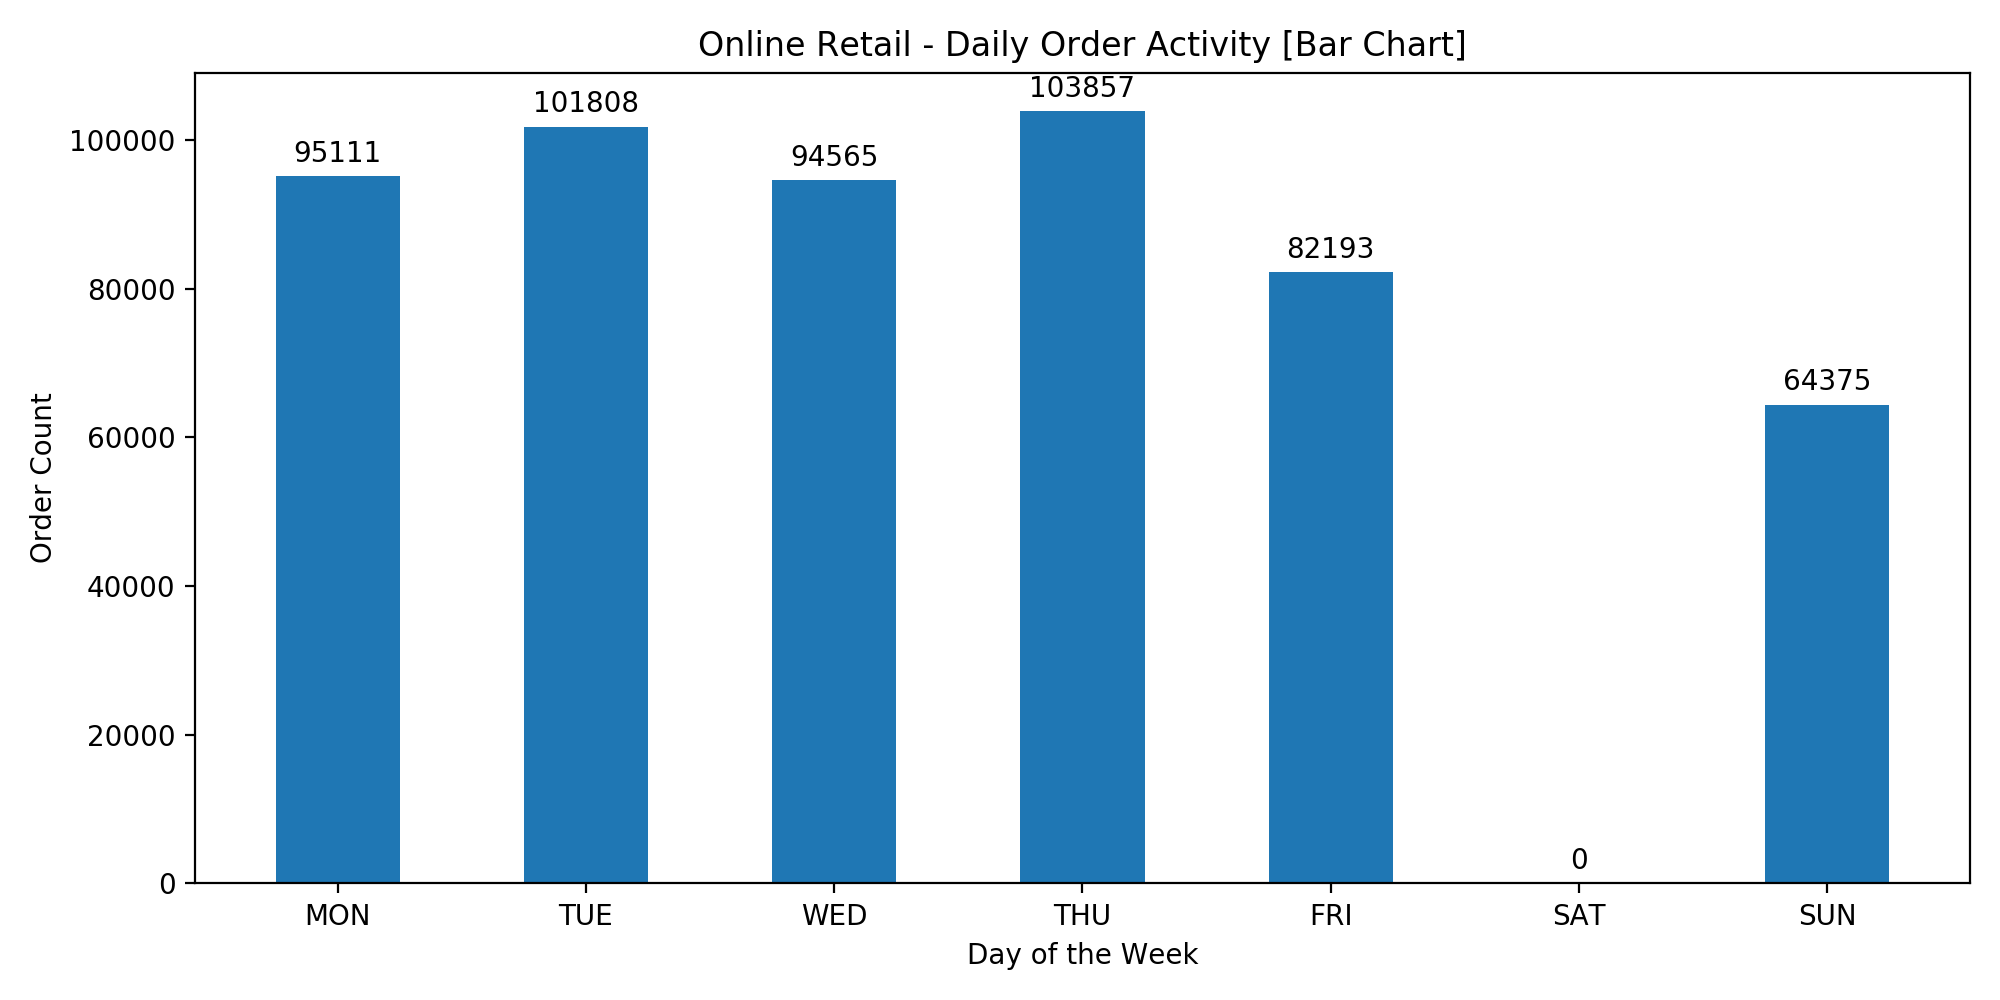

In [76]:
plot_bar_chart(days_list, days_counts)

### Problem 2: Normalize data set and plot a bar chart

#### Normalize : Scale the max day of week as 100%.   And then find the relative comparision with others. 

In [74]:
max_value = max(days_counts)
print(max_value)

days_norm = []
for i in days_counts:
    value = i/max_value * 100
    value = float('%.2f'%(value))
    days_norm.append(value)

print(days_norm)

103857
[91.58, 98.03, 91.05, 100.0, 79.14, 0.0, 61.98]


<IPython.core.display.Javascript object>


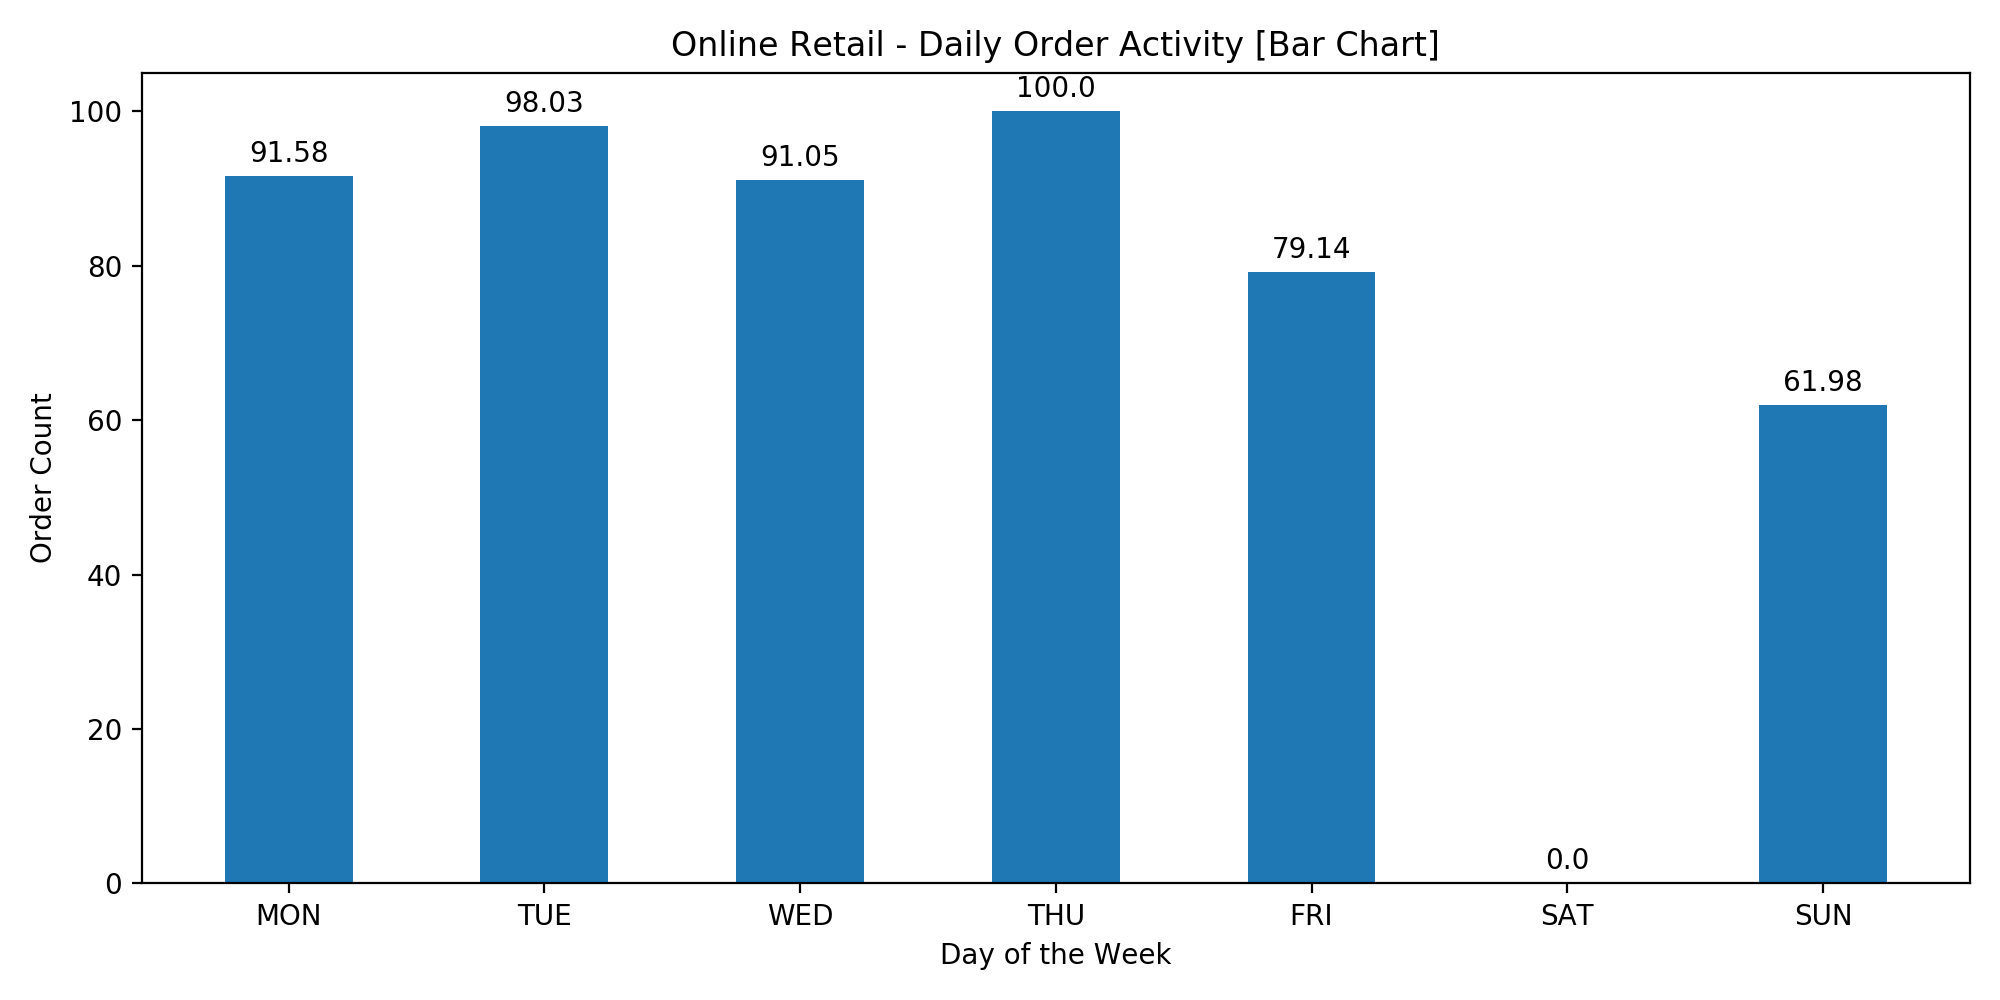

In [77]:
plot_bar_chart(days_list, days_norm)

### Problem 3: Find peak seasonal trends in the year and normalize the trend to get the same result as above for a typical week.

In [97]:
retail_sheet = wb["Online Retail"]
print("Sheet Max rows : %s" % retail_sheet.max_row)

date_format = "%Y/%m/%d"

dates = []
for row in retail_sheet.iter_rows(min_row=2, values_only=True):
    if len(row) > 0:
        cell = row[4]
        day = cell.strftime(date_format)
        dates.append(day)

print("Total Records : %s" % len(dates))
print(dates[0])

Sheet Max rows : 541910
Total Records : 541909
2010/12/01


In [98]:
dates_counter = simple_counter(dates)
print(dates_counter['2010/12/01'])

3108


In [99]:
print(dates_counter)

{'2010/12/01': 3108, '2010/12/02': 2109, '2010/12/03': 2202, '2010/12/05': 2725, '2010/12/06': 3878, '2010/12/07': 2963, '2010/12/08': 2647, '2010/12/09': 2891, '2010/12/10': 2758, '2010/12/12': 1451, '2010/12/13': 2283, '2010/12/14': 2087, '2010/12/15': 1349, '2010/12/16': 1790, '2010/12/17': 3115, '2010/12/19': 522, '2010/12/20': 1763, '2010/12/21': 1586, '2010/12/22': 291, '2010/12/23': 963, '2011/01/04': 1184, '2011/01/05': 1743, '2011/01/06': 1832, '2011/01/07': 1794, '2011/01/09': 1117, '2011/01/10': 1976, '2011/01/11': 1454, '2011/01/12': 1809, '2011/01/13': 1445, '2011/01/14': 1510, '2011/01/16': 646, '2011/01/17': 2557, '2011/01/18': 1447, '2011/01/19': 1416, '2011/01/20': 1502, '2011/01/21': 1594, '2011/01/23': 879, '2011/01/24': 1485, '2011/01/25': 1654, '2011/01/26': 1289, '2011/01/27': 1575, '2011/01/28': 1008, '2011/01/30': 722, '2011/01/31': 1509, '2011/02/01': 1574, '2011/02/02': 1411, '2011/02/03': 989, '2011/02/04': 1232, '2011/02/06': 279, '2011/02/07': 1261, '2011/0

In [100]:
del dates_counter['2010/12/01']
del dates_counter['2010/12/02']
del dates_counter['2010/12/03']
#del dates_counter['2010/12/04']
del dates_counter['2010/12/05']
del dates_counter['2010/12/06']
del dates_counter['2010/12/07']
del dates_counter['2010/12/08']
del dates_counter['2010/12/09']
print(dates_counter)

{'2010/12/10': 2758, '2010/12/12': 1451, '2010/12/13': 2283, '2010/12/14': 2087, '2010/12/15': 1349, '2010/12/16': 1790, '2010/12/17': 3115, '2010/12/19': 522, '2010/12/20': 1763, '2010/12/21': 1586, '2010/12/22': 291, '2010/12/23': 963, '2011/01/04': 1184, '2011/01/05': 1743, '2011/01/06': 1832, '2011/01/07': 1794, '2011/01/09': 1117, '2011/01/10': 1976, '2011/01/11': 1454, '2011/01/12': 1809, '2011/01/13': 1445, '2011/01/14': 1510, '2011/01/16': 646, '2011/01/17': 2557, '2011/01/18': 1447, '2011/01/19': 1416, '2011/01/20': 1502, '2011/01/21': 1594, '2011/01/23': 879, '2011/01/24': 1485, '2011/01/25': 1654, '2011/01/26': 1289, '2011/01/27': 1575, '2011/01/28': 1008, '2011/01/30': 722, '2011/01/31': 1509, '2011/02/01': 1574, '2011/02/02': 1411, '2011/02/03': 989, '2011/02/04': 1232, '2011/02/06': 279, '2011/02/07': 1261, '2011/02/08': 1228, '2011/02/09': 879, '2011/02/10': 785, '2011/02/11': 957, '2011/02/13': 624, '2011/02/14': 1108, '2011/02/15': 1335, '2011/02/16': 1191, '2011/02/17

In [88]:
from datetime import datetime

In [101]:
day_of_year_counter = {}

for i in dates_counter.keys():
    d = datetime.strptime(i, date_format)
    d_num = d.strftime('%j')
    day_of_year_counter[d_num] = dates_counter[i] 

print(day_of_year_counter)

{'344': 2758, '346': 1451, '347': 2283, '348': 2087, '349': 1349, '350': 1790, '351': 3115, '353': 522, '354': 1763, '355': 1586, '356': 291, '357': 963, '004': 1184, '005': 1743, '006': 1832, '007': 1794, '009': 1117, '010': 1976, '011': 1454, '012': 1809, '013': 1445, '014': 1510, '016': 646, '017': 2557, '018': 1447, '019': 1416, '020': 1502, '021': 1594, '023': 879, '024': 1485, '025': 1654, '026': 1289, '027': 1575, '028': 1008, '030': 722, '031': 1509, '032': 1574, '033': 1411, '034': 989, '035': 1232, '037': 279, '038': 1261, '039': 1228, '040': 879, '041': 785, '042': 957, '044': 624, '045': 1108, '046': 1335, '047': 1191, '048': 1719, '049': 854, '051': 864, '052': 1425, '053': 1593, '054': 1578, '055': 1294, '056': 978, '058': 812, '059': 1737, '060': 1361, '061': 935, '062': 1389, '063': 1107, '065': 844, '066': 1971, '067': 1600, '068': 1277, '069': 1131, '070': 959, '072': 537, '073': 1111, '074': 1292, '075': 874, '076': 2074, '077': 1379, '079': 1453, '080': 1068, '081':

In [103]:
x = [i for i in range(366)]
y = [day_of_year_counter.get(str(i),0) for i in range(366)]
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

<IPython.core.display.Javascript object>


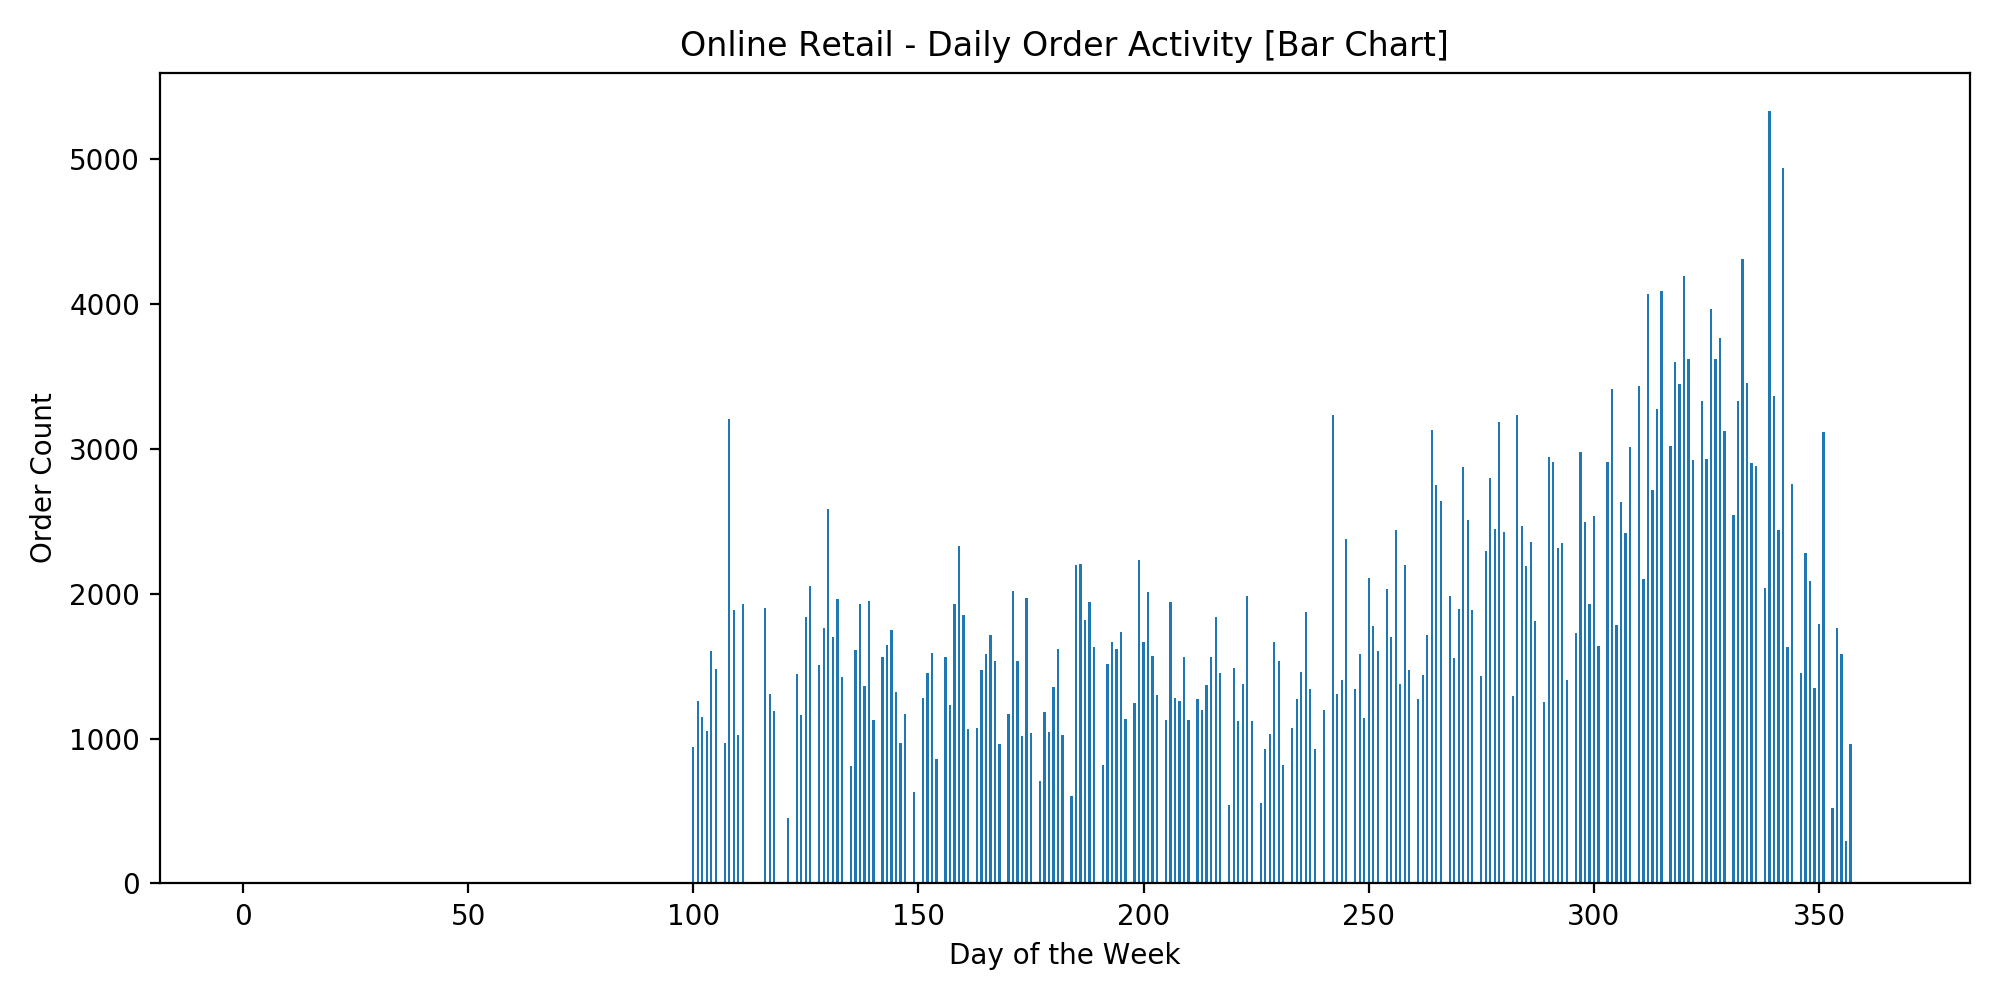

In [106]:
plot_bar_chart(x, y, False)

### based on the day trend, holiday season spikes impact all days not influence on specific days, so no normalization is needed